This test compares single bounce ZipinBrdf with Beckman Brdf using Blin G
alpha is roughness, increase this value will increase the spread of the brdf.
theta_o is the incident direction, phi is fixed at 0.


In [1]:
import math;
alpha = .9
theta_o = math.pi/3;
maxBounce = 4

zipinVersion:  Feng


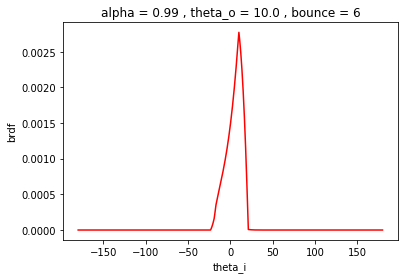

In [6]:
import sys;
sys.path.append('/usr/local/lib/python3.6/site-packages')
import math;
import brdf;
import vec3;
import random;
import matplotlib.pyplot as plt;

maxBounce = 3
alpha = .99
theta_o = math.radians(10);

zipinVersion = 'Feng'
beckman = brdf.Brdf(alpha, alpha);
zipin= brdf.ZipinBrdf(alpha, alpha,  zipinVersion)

phi_i = phi_o = 0
wo = vec3.Vec3(math.sin(theta_o)* math.cos(phi_o), math.sin(theta_o) * math.sin(phi_o), math.cos(theta_o))
xdata= [];              
zdata=[]; 
bdata = [];
blindata = []

sampleCount = 1000
minAngle = -math.pi 
#minAngle = math.radians(-50)
maxAngle = math.pi
#maxAngle = math.radians(0)
rangeAngle = maxAngle - minAngle
minBounce = 5
maxBounce = 6
for i in range(1,sampleCount):
    thetaWi = minAngle + rangeAngle * float(i)/float(sampleCount) 
    mu = math.cos(thetaWi)
    wi = vec3.Vec3(math.sin(thetaWi)* math.cos(phi_i), math.sin(thetaWi) * math.sin(phi_i), mu)
    beval = beckman.Eval(wo, wi, 1)
    blin_eval = beckman.Eval(wo, wi, 2)
    zeval = zipin.Eval(wo, wi, 0, 0, maxBounce, minBounce)
    xdata.append(math.degrees(thetaWi))
    bdata.append(beval[0])
    blindata.append(blin_eval[0])
    zdata.append(zeval[0])

#plt.plot(xdata, blindata, 'b^', label="Beckman with Blin G");
#plt.plot(xdata, bdata, 'g^', label="Beckman with Walter G");
plt.plot(xdata, zdata, 'r-', label='Zipin');
#plt.legend(loc=1)
plt.xlabel('theta_i')
plt.ylabel('brdf')
titleString = 'alpha = '+ repr(alpha) + ' , theta_o = '+ repr(math.degrees(theta_o))+' , bounce = ' + repr(maxBounce)
plt.title(titleString)                                                                             
plt.autoscale(True, 'both', False)
plt.show()  

    



In [1]:
minWh = 0
maxWh = math.pi * .5
rangeWh = maxWh - minWh
ddata = []
xdata = []
Found = False
for i in range (1, sampleCount):
    thetaWh = minWh + rangeWh * float(i)/float(sampleCount)
    wh = vec3.Vec3(math.sin(thetaWh) * math.cos(phi_i), math.sin(thetaWh) * math.sin(phi_i), math.cos(thetaWh))
    d = beckman.microfacet.D(wh)
    if d < 1e-6 and not Found:
        theta = 90.0 - math.degrees(thetaWh)
        thetaP = theta/180.0
        print(theta, thetaP)
        Found = True
    ddata.append(d)
    xdata.append(math.degrees(thetaWh))
plt.plot(xdata, ddata, 'b^', label="Beckman Distribution");
plt.title('beckman distribution half vector')
plt.autoscale(True, 'both', True)
plt.show() 

NameError: name 'math' is not defined